In [1]:
import string
import numpy
import pandas

def only_alpha(str):
    input_char = ""
    for char in str:
        if char.isalpha():
            input_char += char
    return input_char

def permutation(str,n,dict):
    for i in range(len(only_alpha(str))-1):
        if only_alpha(str)[i:i+2] not in dict:
            dict[only_alpha(str)[i:i+2]] = n
            continue
        dict[only_alpha(str)[i:i+2]] += n

In [2]:
count = {}
# Starters
permutation("D → G → D → J → D → J → L → S → T → D → N → D", 325, count)
permutation("D → E → D ", 175, count)
permutation("D → E → V → D → R → E → D", 225, count)
permutation("D → V → D → K → P → L → D", 200, count)
#permutation("D → E → E → T → D → S/O/M → D", 325, count)
permutation("D → E → T → D → S → D", 100, count)
permutation("D → E → T → D → O → D", 100, count)
permutation("D → E → T → D → M → D", 125, count)

permutation("D → T → F → R → C → D", 120, count)
permutation("D → V → D → G → P → N → D", 70, count)
permutation("D → G → D → I → L → G → D", 120, count)
permutation("D → C → H → C → P → Q → C → O → D", 100, count)
permutation("D → P → A → B → T → Q → P → D", 100, count)

In [3]:
# Elderly/Disabled
permutation("C → T → S → C → S → G → W → G → S → C → E → C → L → T → D → C", 125, count)
permutation("C → S → R → W → L → P → L → C → D → S → C → R → C", 50, count)
permutation("C → G → P → L → W → J → W → G → S → C", 25, count)
permutation("C → V → T → C → D → S → N → O → M → G → K → W → L → P → A → P → Q → G → R → S → C", 75, count)
permutation("C → T → S → G → O → N → V → T → G → C → W → L → T → S → C", 25, count)

permutation("C → S → D → S → G → E → R → S → C", 20, count)
permutation("C → S → E → G → S → C → G → N → M → C", 20, count)
permutation("C → T → C → G → V → W → R → N → O → S → C", 30, count)
permutation("C → T → C → S → G → R → C", 20, count)
permutation("C → S → V → T → C → G → W → K → J → I → J → W → P → G → N → T → C", 30, count)

In [4]:
# Students
permutation("B → F → B → Q → T → Q → M → B", 300, count)
permutation("A → V → A → T → A → F → A", 300, count)
permutation("B → W → L → T → B → N → B", 500, count)
permutation("B → T → B → F → B → I → B", 50, count)
permutation("A → F → K → T → A → V → A", 100, count)

permutation("B → T → W → B → L → B", 10, count)
permutation("B → L → T → B → L → W → B → R → M → O → B", 200, count)
permutation("A → T → A → V → A → G → N → O → A", 150, count)
permutation("B → G → N → B → T → Q → B", 50, count)
permutation("A → L → G → W → A → T → A → O → A", 90, count)

In [5]:
# Visitors
permutation("F → G → L → W → L → T → N → F", 50*4, count)
permutation("F → R → M → F", 40*2, count)
permutation("E → I → J → W → J → T → E", 100*5, count)
permutation("H → G → S → L → G → D → T", 30*5, count)
#permutation("E → K → T/W/R → K → V → T → E", 60, count)
permutation("E → K → T → K → V → T → E", 20*5, count)
permutation("E → K → W → K → V → T → E", 20*5, count)
permutation("E → K → R → K → V → T → E", 20*5, count)

permutation("F → L → R → O → T → C → F", 60*1, count)
permutation("F → O → T → M → F", 40*2, count)
permutation("F → R → M → N → F", 40*1, count)
permutation("W → G → S → T", 60*2, count)
#permutation("F → T → B/A/D → F", 50, count)
permutation("F → T → B → F", 15*2, count)
permutation("F → T → A → F", 15*2, count)
permutation("F → T → D → F", 20*2, count)

In [8]:
uplt = string.ascii_uppercase[:20] + string.ascii_uppercase[21:23]

count_matrix = numpy.zeros((22,22))
tf_matrix = numpy.zeros((22,22))

for letter1 in uplt:
    for letter2 in uplt:
        if letter1+letter2 in count.keys():
            count_matrix[uplt.index(letter1)][uplt.index(letter2)] += count[letter1+letter2]
            tf_matrix[uplt.index(letter1)][uplt.index(letter2)] = 1
        if letter2+letter1 in count.keys():
            count_matrix[uplt.index(letter1)][uplt.index(letter2)] += count[letter2+letter1]
            tf_matrix[uplt.index(letter1)][uplt.index(letter2)] = 1
count_matrix

count_matrix_0_1 = count_matrix/count_matrix.max()

# Degree
# 0.2 and 0.4 ... are not actual numbers, just for convenience
count_matrix_degree = pandas.cut(count_matrix_0_1.flatten(), bins=4, labels=[0.2,0.4,0.6,0.8])
count_matrix_degree_matrix = numpy.asarray(count_matrix_degree).reshape((22,22)).tolist()

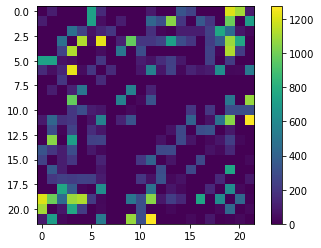

In [9]:
import matplotlib.pyplot as plt
plt.imshow(count_matrix)
plt.colorbar()
plt.show()

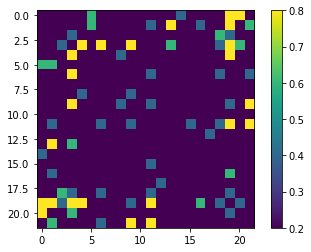

In [8]:
plt.imshow(count_matrix_degree_matrix)
plt.colorbar()
plt.show()

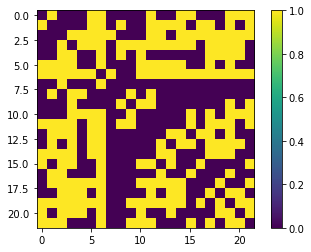

In [11]:
plt.imshow(tf_matrix)
plt.colorbar()
plt.show()

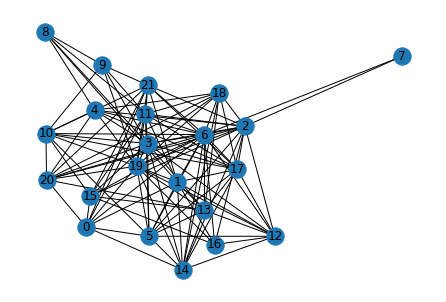

In [10]:
import networkx as nx
G = nx.from_numpy_matrix(count_matrix_0_1)
nx.draw(G, with_labels=True)

In [12]:
df = pandas.DataFrame(count_matrix_0_1).T
df.to_excel(excel_writer="./matrix.xlsx")